<a target="_blank" href="https://colab.research.google.com/github/SLCFLAB/Fintech2025-2/blob/main/ML_day3/3_3_HierarchicalClustering_and_DBSCAN.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# ML_day3_3

### Hierarchcial Agglomerative Clustering

### 데이터 생성

In [8]:
import pandas as pd
import numpy as np

np.random.seed(123)

variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']

X = np.random.random_sample([5, 3])*10
df = pd.DataFrame(X, columns=variables, index=labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


### 거리행렬 계산

In [9]:
from scipy.spatial.distance import pdist, squareform

row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')),
                        columns=labels,
                        index=labels)

row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


### Linkage Matrix 생성
- 데이터 포인트 간의 거리 행렬을 입력으로 받아, 거리에 기반하여 클러스터 간의 유사성을 계산하고 클러스터 간의 연결 정보를 생성
- 참고: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

In [10]:
from scipy.cluster.hierarchy import linkage
row_clusters = linkage(pdist(df, metric='euclidean'), method='complete')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1)
                    for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


### Dendrogram 그리기

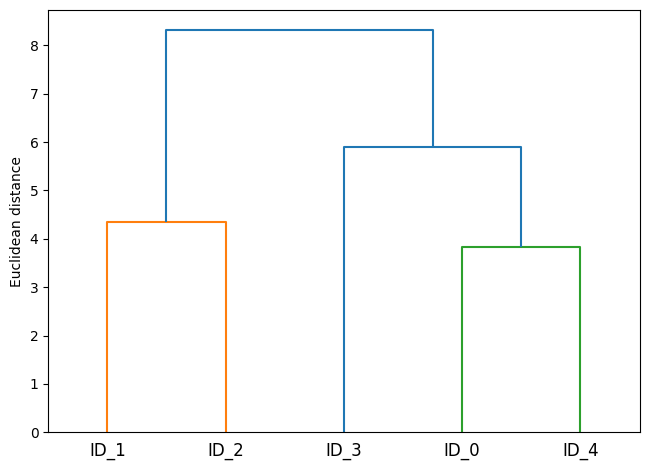

In [15]:
from scipy.cluster.hierarchy import dendrogram
from matplotlib import pyplot as plt
#make dendrogram black (part 1/2)
#from scipy.cluster.hierarchy import set_link_color_palette
#et_link_color_palette(['black'])

row_dendr = dendrogram(row_clusters,
                       labels=labels,
                       # make dendrogram black (part 2/2)
                       #color_threshold=np.inf
                       )
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

### Scikit-Learn을 활용한 Agglomerative Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3,
                             affinity='euclidean',
                             linkage='complete')
labels = ac.fit_predict(X)
print(ac)
print('Cluster labels: %s' % labels)

AgglomerativeClustering(linkage='complete', n_clusters=3)
Cluster labels: [1 0 0 2 1]


In [ ]:
ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean',
                             linkage='complete')
labels = ac.fit_predict(X)
print('Cluster labels: %s' % labels)

Cluster labels: [0 1 1 0 0]


## DBSCAN

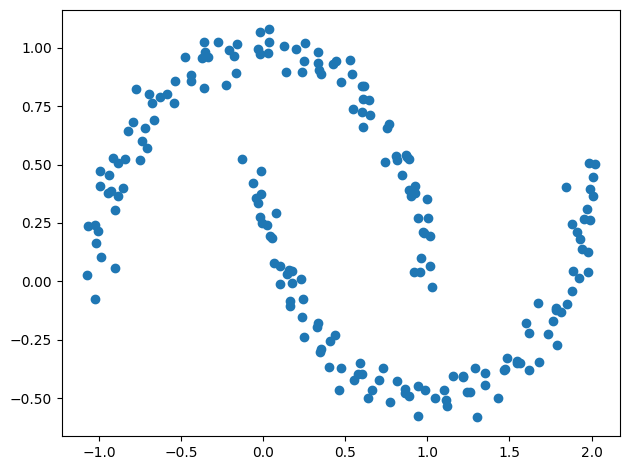

In [13]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
plt.scatter(X[:, 0], X[:, 1])
plt.tight_layout()
plt.show()

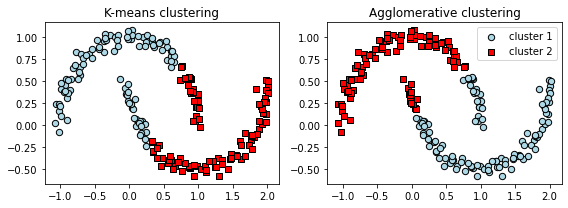

In [ ]:

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)

ax1.scatter(X[y_km == 0, 0], X[y_km == 0, 1],
           edgecolor='black',
           c='lightblue', marker='o', s=40, label='cluster 1')
ax1.scatter(X[y_km == 1, 0], X[y_km == 1, 1],
           edgecolor='black',
           c='red', marker='s', s=40, label='cluster 2')
ax1.set_title('K-means clustering')

ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean',
                             linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac == 0, 0], X[y_ac == 0, 1], c='lightblue',
            edgecolor='black',
            marker='o', s=40, label='cluster 1')
ax2.scatter(X[y_ac == 1, 0], X[y_ac == 1, 1], c='red',
            edgecolor='black',
            marker='s', s=40, label='cluster 2')
ax2.set_title('Agglomerative clustering')

plt.legend()
plt.tight_layout()
plt.show()

Text(0.5, 1.0, '20 K-means clustering')

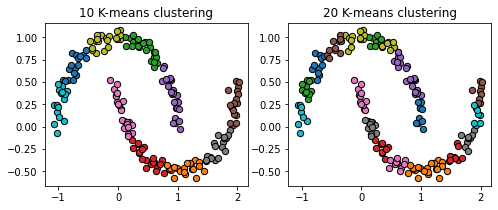

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

km = KMeans(n_clusters=10, random_state=0)
y_km = km.fit_predict(X)
for i in range (10):
    ax1.scatter(X[y_km == i, 0], X[y_km == i, 1],
           edgecolor='black',
            marker='o', s=40, label='cluster'+str(i))
ax1.set_title('10 K-means clustering')

km = KMeans(n_clusters=20, random_state=0)
y_km = km.fit_predict(X)
for i in range (20):
    ax2.scatter(X[y_km == i, 0], X[y_km == i, 1],
           edgecolor='black',
            marker='o', s=40, label='cluster'+str(i))
ax2.set_title('20 K-means clustering')

- dbscan: 밀도기반 클러스터링 군집화 알고리즘
- 밀도가 높은 지역을 클러스터로 인식하고 밀도가 낮은 지역을 이상치로 처리
- 클러스터의 모양에 대해 가정을 하지 않기 때문에, 임의 모양의 클러스터도 잘 인식
- eps 내에 존재하는 데이터 포인트를 이웃으로 간주
- core point: eps 내에 최소 데이터 포인트 개수(min_samples) 이상의 이웃을 가지는 데이터 포인트

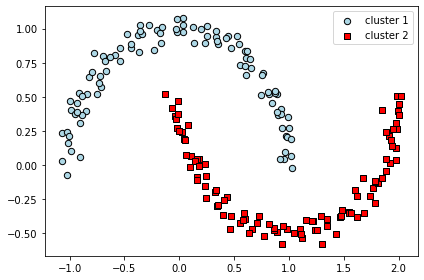

In [ ]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)
plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1],
            c='lightblue', marker='o', s=40,
            edgecolor='black',
            label='cluster 1')
plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1],
            c='red', marker='s', s=40,
            edgecolor='black',
            label='cluster 2')
plt.legend()
plt.tight_layout()
plt.show()